# Effects of Electric Vehicle Adoption on Carbon Dioxide Emissions of East Asian Countries
by: Knulp Dalmero Aseo

Transportation accounted for roughly 16 percent of total Carbon Dioxide emissions, worldwide, in 2021 (Climate Watch, 2024). This figure comes second only to electricity generation and heating. Around 75 percent of the emissions are caused by road vehicles, with passenger vehicles such as cars, buses, and motorcycles accounting for 45.1 percent of it (Our World in Data, 2020). In recent years, electric vehicles have become a key tool in reducing the carbon footprint of the sector (Chen et al, 2020). However, research on its effectivity in reducing CO2 emissions is still minimal as EV adoption is still relatively low. 

Nonetheless, this research exercise aims to determine if there is indeed a correlation between increasing EV adoption and CO2 emissions of countries in East Asia. The region was selected as it has become a growth sector for EVs in recent years. In particular, China has become a global leader in lithium-ion battery development and EV production. 

#### Research Question: How does increasing adoption of electric vehicles (EV) affect the CO2 emissions of East Asia countries? 

### Data Sets: 
| Data | Definition | Source|
|----------|----------|----------|
| EV Stock Share (Historical)| The percentage of all vehicles on the road in a particular country or globally that are electric vehicles (BEVs and PHEVs) at the end of a specific period | https://api.iea.org/evs?parameters=EV%20stock%20share&category=Historical&mode=Cars&csv=true' |
| CO2 Emissions per Capita | Fossil emissions measure the quantity of carbon dioxide (CO₂) emitted from the burning of fossil fuels, and directly from industrial processes such as cement and steel production. Fossil CO₂ includes emissions from coal, oil, gas, flaring, cement, steel, and other industrial processes. Fossil emissions do not include land use change, deforestation, soils, or vegetation. | https://ourworldindata.org/grapher/co-emissions-per-capita.csv?v=1&csvType=full&useColumnShortNames=true |

### Limitations of the Research: 
Due to limited time, very few controls (e.g industrial output, GDP per capita, etc.) were introduced in the analysis. However, outside literature will be used as much as possible to explain and provide context to the findings. 

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np  
import zipfile
import io
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr

# Download and read the EV stock share data from IEA
url='https://api.iea.org/evs?parameters=EV%20stock%20share&category=Historical&mode=Cars&csv=true'
response = requests.get(url)
evshare_df = pd.read_csv(url)

#Download and read the CO2 emissions per capita data from Our World in Data
co2_df = pd.read_csv("https://ourworldindata.org/grapher/co-emissions-per-capita.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
metadata = requests.get("https://ourworldindata.org/grapher/co-emissions-per-capita.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

#Filter the data for EV stock share
evstock_filter = evshare_df['parameter'] == 'EV stock share'
ev_filter = evshare_df['powertrain'] == 'EV'
evshare_filtered = evshare_df[evstock_filter & ev_filter]

#Clean the data
evshare_filtered = evshare_filtered.dropna()
evshare_filtered = evshare_filtered.drop(columns=["mode", "unit", "category", "parameter", "powertrain"])
co2_df = co2_df.dropna()
co2_df = co2_df.drop(columns=["Code"])

#Rename columns
evshare_filtered = evshare_filtered.rename(columns={
    'region': 'Entity',
    'year': 'Year',
    'value': 'Share of EVs (%)',
})
co2_df = co2_df.rename(columns={
    'Entity': 'Entity',
    'Year': 'Year',
    'emissions_total_per_capita': 'CO2 Emissions per Capita (tonnes/person)',
})

# Indexing and renaming columns
evshare_filtered['Entity'] = evshare_filtered['Entity'].replace(['Korea', 'South Korea'], 'South Korea')
evshare_index = evshare_filtered.set_index(['Entity', 'Year'])
co2_index = co2_df.set_index(['Entity', 'Year'])

# Merge the two dataframes on Entity and Year
merged_df = evshare_index.merge(co2_index, on=['Entity', 'Year'], how='inner')

# Ensure numbers are in the correct format
merged_df['Share of EVs (%)'] = pd.to_numeric(merged_df['Share of EVs (%)'], errors='coerce')
merged_df['CO2 Emissions per Capita (tonnes/person)'] = pd.to_numeric(merged_df['CO2 Emissions per Capita (tonnes/person)'], errors='coerce')

# Reset index to make it easier to work with
merged_df = merged_df.reset_index()

# Save the merged dataframe to a CSV file
merged_df.to_csv('HW2_ev_co2_data.csv', index=False)

#Descriptive statistics
describe_merged = merged_df[['Share of EVs (%)', 'CO2 Emissions per Capita (tonnes/person)']].describe()
print("Descriptive Statistics for EV Share:")
print(describe_merged)

Descriptive Statistics for EV Share:
       Share of EVs (%)  CO2 Emissions per Capita (tonnes/person)
count        464.000000                                464.000000
mean           1.056479                                  6.989706
std            2.949072                                  3.435808
min            0.000021                                  1.344883
25%            0.013750                                  4.596278
50%            0.089000                                  6.872889
75%            0.622500                                  8.720834
max           30.000000                                 17.965439


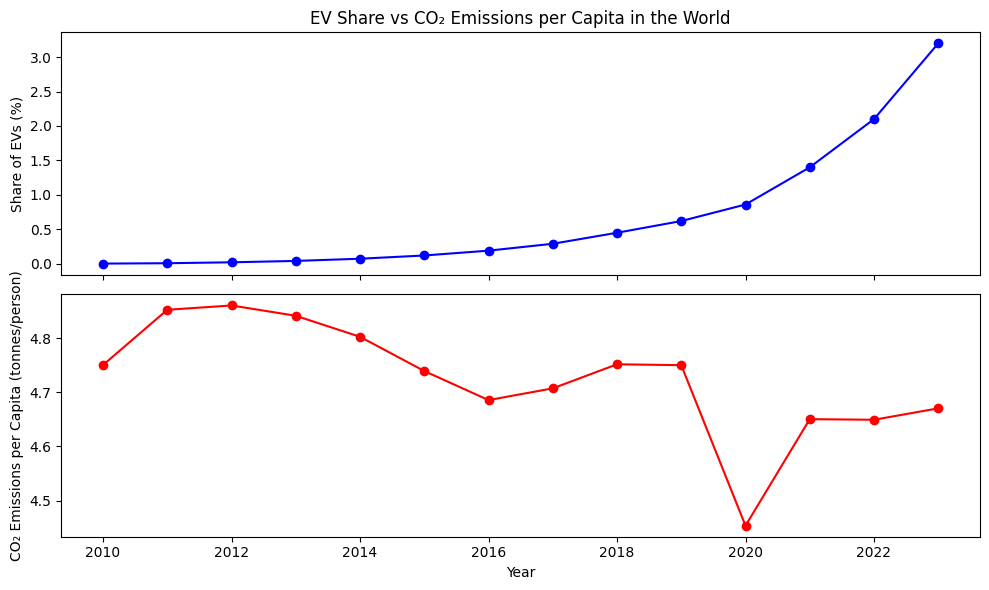

In [ ]:
# Plotting the data (World)
country = 'World'
df_country = merged_df[merged_df['Entity'] == country]

# Extract time series
years = df_country['Year']
ev_share = df_country['Share of EVs (%)']
ghg_emissions = df_country['CO2 Emissions per Capita (tonnes/person)']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.plot(years, ev_share, color='blue', marker='o')
ax1.set_ylabel('Share of EVs (%)')
ax1.set_title(f'EV Share vs CO₂ Emissions per Capita in the {country}')

ax2.plot(years, ghg_emissions, color='red', marker='o')
ax2.set_ylabel('CO₂ Emissions per Capita (tonnes/person)')
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

A similar story emerges in Japan and Korea. 

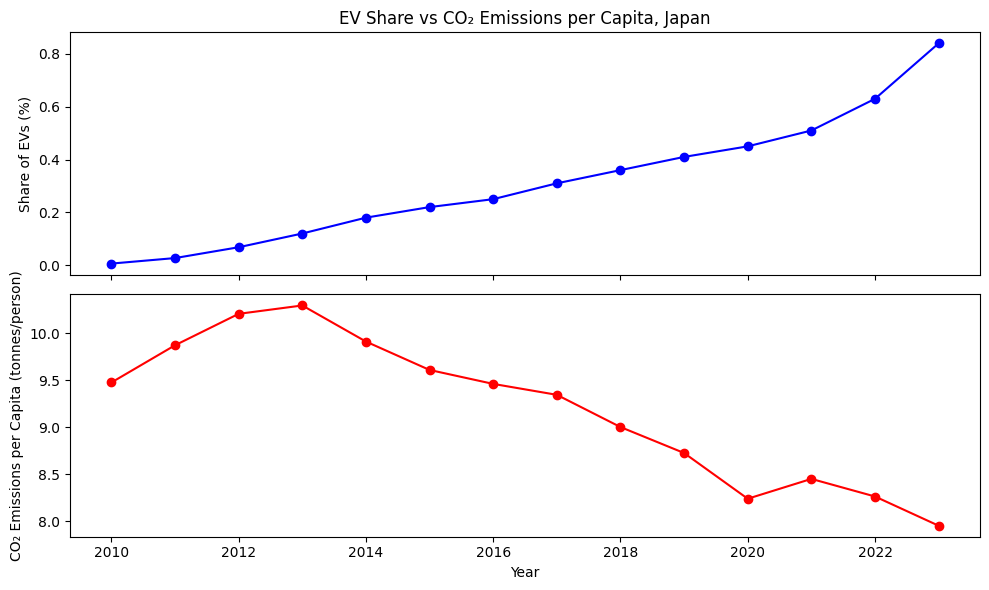

In [12]:
# Plotting the data (Japan)
country = 'Japan'
df_JP = merged_df[merged_df['Entity'] == country]

# Extract time series
years = df_JP['Year']
ev_share = df_JP['Share of EVs (%)']
ghg_emissions = df_JP['CO2 Emissions per Capita (tonnes/person)']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.plot(years, ev_share, color='blue', marker='o')
ax1.set_ylabel('Share of EVs (%)')
ax1.set_title(f'EV Share vs CO₂ Emissions per Capita, {country}')

ax2.plot(years, ghg_emissions, color='red', marker='o')
ax2.set_ylabel('CO₂ Emissions per Capita (tonnes/person)')
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

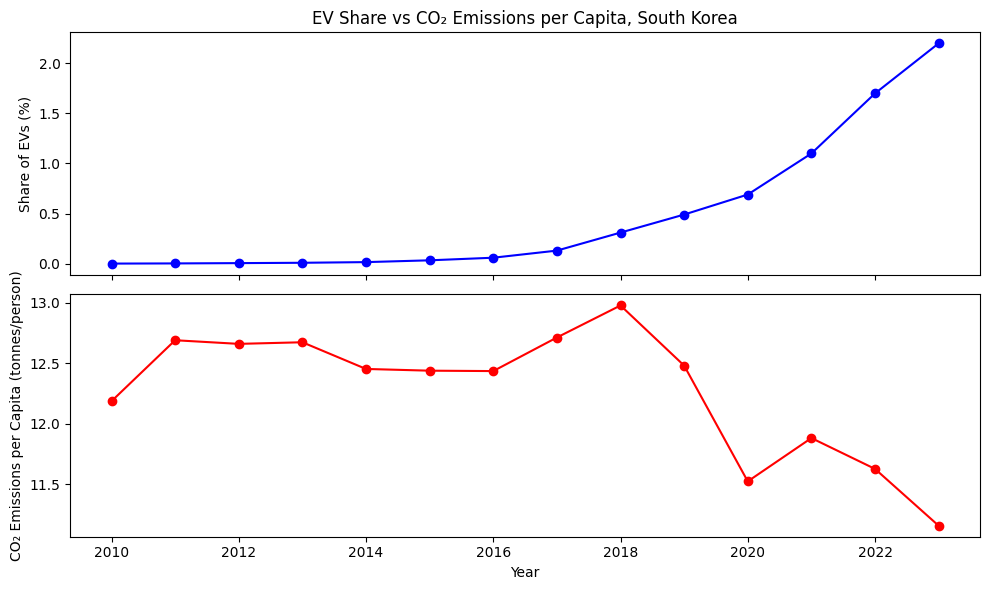

In [14]:
# Plotting the data (South Korea)
country = 'South Korea'
df_KR = merged_df[merged_df['Entity'] == country]

# Extract time series
years = df_KR['Year']
ev_share = df_KR['Share of EVs (%)']
ghg_emissions = df_KR['CO2 Emissions per Capita (tonnes/person)']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.plot(years, ev_share, color='blue', marker='o')
ax1.set_ylabel('Share of EVs (%)')
ax1.set_title(f'EV Share vs CO₂ Emissions per Capita, {country}')

ax2.plot(years, ghg_emissions, color='red', marker='o')
ax2.set_ylabel('CO₂ Emissions per Capita (tonnes/person)')
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

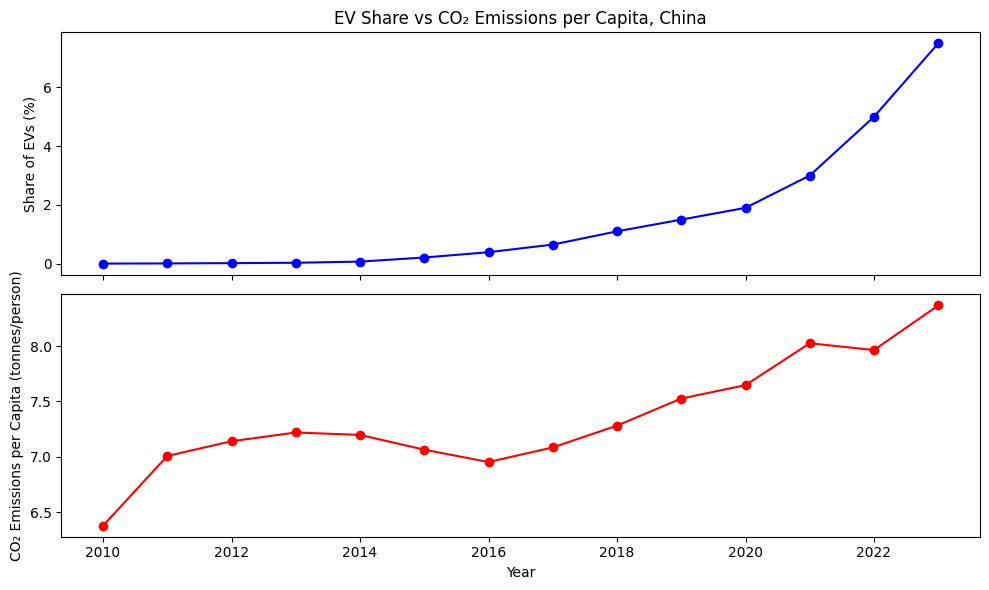

In [13]:
# Plotting the data (China)
country = 'China'
df_CN = merged_df[merged_df['Entity'] == country]

# Extract time series
years = df_CN['Year']
ev_share = df_CN['Share of EVs (%)']
ghg_emissions = df_CN['CO2 Emissions per Capita (tonnes/person)']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.plot(years, ev_share, color='blue', marker='o')
ax1.set_ylabel('Share of EVs (%)')
ax1.set_title(f'EV Share vs CO₂ Emissions per Capita, {country}')

ax2.plot(years, ghg_emissions, color='red', marker='o')
ax2.set_ylabel('CO₂ Emissions per Capita (tonnes/person)')
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

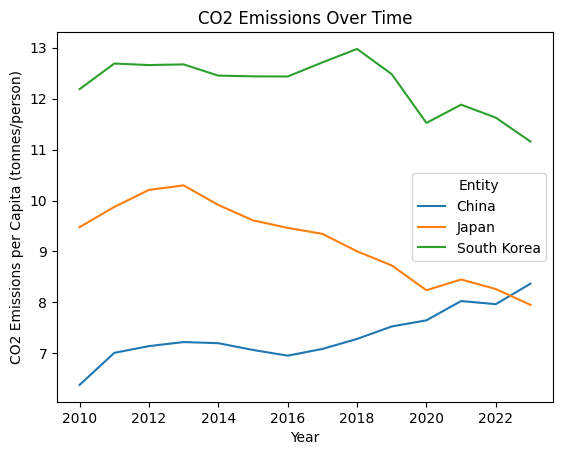

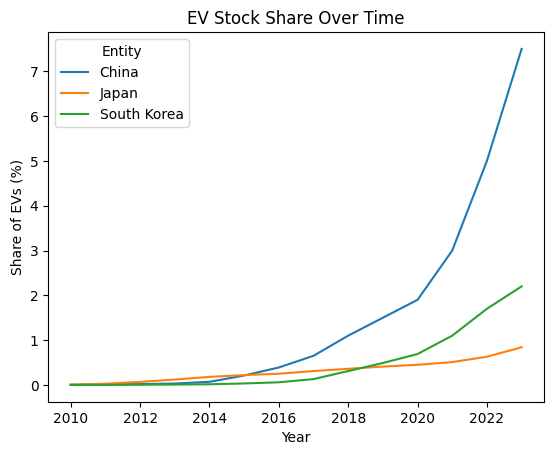

In [ ]:
#Combined lineplot for East Asia
df_eastasia = merged_df[merged_df['Entity'].isin(['China', 'Japan', 'South Korea'])]
sns.lineplot(data=df_eastasia, x='Year', y='CO2 Emissions per Capita (tonnes/person)', hue='Entity')
plt.title('CO2 Emissions Over Time')
plt.show()

sns.lineplot(data=df_eastasia, x='Year', y='Share of EVs (%)', hue='Entity')
plt.title('EV Stock Share Over Time')
plt.show()

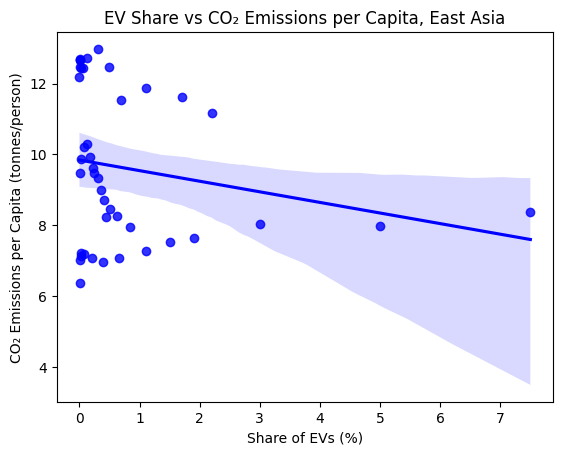

In [17]:
#Scatter plot with regression line for East Asia
sns.regplot(x='Share of EVs (%)', y='CO2 Emissions per Capita (tonnes/person)', data=df_eastasia, color='blue')
plt.title(f'EV Share vs CO₂ Emissions per Capita, East Asia')
plt.xlabel('Share of EVs (%)')
plt.ylabel('CO₂ Emissions per Capita (tonnes/person)')
plt.show()

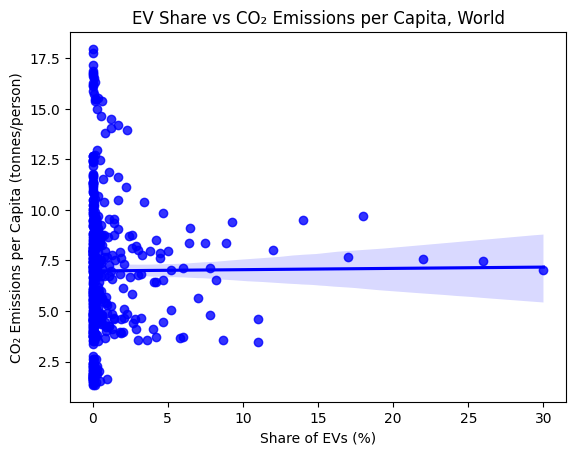

In [28]:
#Scatter plot with regression line for World
sns.regplot(x='Share of EVs (%)', y='CO2 Emissions per Capita (tonnes/person)', data=merged_df, color='blue')
plt.title(f'EV Share vs CO₂ Emissions per Capita, World')
plt.xlabel('Share of EVs (%)')
plt.ylabel('CO₂ Emissions per Capita (tonnes/person)')
plt.show()


In [27]:
# Correlation analysis for East Asia (by country)
df_eastasia = df_eastasia.dropna(subset=['Share of EVs (%)', 'CO2 Emissions per Capita (tonnes/person)'])
countries = df_eastasia['Entity'].unique()

for country in countries:
    country_df = df_eastasia[df_eastasia['Entity'] == country].copy() 

    # Extract the two series for the current country
    co2_series = country_df['CO2 Emissions per Capita (tonnes/person)']
    ev_series = country_df['Share of EVs (%)']
   

    # Ensure there's enough data and no NaNs that would prevent calculation
    if len(co2_series) > 1 and len(ev_series) > 1 and not co2_series.isnull().any() and not ev_series.isnull().any():
        # Use scipy.stats.pearsonr
        correlation_coefficient, p_value = pearsonr(co2_series, ev_series)

        print(f"Pearson's r for {country} (CO2 Emissions per capita vs EV Share): {correlation_coefficient:.3f}")
        print(f"P-value for {country}: {p_value:.3f}")
        if p_value < 0.05:
            print(f"  -> The correlation for {country} is statistically significant (p < 0.05).")
        else:
            print(f"  -> The correlation for {country} is NOT statistically significant (p >= 0.05).")
    else:
        print(f"Not enough valid data points for {country} to calculate correlation and p-value.")
    print("-" * 30)

# Correlation analysis for East Asia (combined)
co2_eastasia = df_eastasia['CO2 Emissions per Capita (tonnes/person)']
ev_eastasia = df_eastasia['Share of EVs (%)']
    
if len(co2_eastasia) > 1 and len(ev_eastasia) > 1 and not co2_eastasia.isnull().any() and not ev_eastasia.isnull().any():
    # Use scipy.stats.pearsonr
    correlation_coefficient, p_value = pearsonr(co2_eastasia, ev_eastasia)
    print(f"Pearson's r for East Asia (CO2 Emissions per capita vs EV Share): {correlation_coefficient:.3f}")
    print(f"P-value for East Asia: {p_value:.3f}")

    if p_value < 0.05:
        print(f"  -> The correlation for East Asia is statistically significant (p < 0.05).")
    else:
        print(f"  -> The correlation for East Asia is NOT statistically significant (p >= 0.05).")
else:
    print(f"Not enough valid data points for East Asia to calculate correlation and p-value.")
print("-" * 30)

# Correlation analysis for World
co2_world = merged_df['CO2 Emissions per Capita (tonnes/person)']
ev_world = merged_df['Share of EVs (%)']
if len(co2_world) > 1 and len(ev_world) > 1 and not co2_world.isnull().any() and not ev_world.isnull().any():
    # Use scipy.stats.pearsonr
    correlation_coefficient, p_value = pearsonr(co2_world, ev_world)
    print(f"Pearson's r for World (CO2 Emissions per capita vs EV Share): {correlation_coefficient:.3f}")
    print(f"P-value for World: {p_value:.3f}")

    if p_value < 0.05:
        print(f"  -> The correlation for World is statistically significant (p < 0.05).")
    else:
        print(f"  -> The correlation for World is NOT statistically significant (p >= 0.05).")


Pearson's r for China (CO2 Emissions per capita vs EV Share): 0.875
P-value for China: 0.000
  -> The correlation for China is statistically significant (p < 0.05).
------------------------------
Pearson's r for Japan (CO2 Emissions per capita vs EV Share): -0.905
P-value for Japan: 0.000
  -> The correlation for Japan is statistically significant (p < 0.05).
------------------------------
Pearson's r for South Korea (CO2 Emissions per capita vs EV Share): -0.843
P-value for South Korea: 0.000
  -> The correlation for South Korea is statistically significant (p < 0.05).
------------------------------
Pearson's r for East Asia (CO2 Emissions per capita vs EV Share): -0.200
P-value for East Asia: 0.203
  -> The correlation for East Asia is NOT statistically significant (p >= 0.05).
------------------------------
Pearson's r for World (CO2 Emissions per capita vs EV Share): 0.005
P-value for World: 0.907
  -> The correlation for World is NOT statistically significant (p >= 0.05).


### Initial Findings: 

We can see in this comparative graph of the Share of EVs (%) and CO2 emissions per capita that while EV share continued to rise in the past ten years, CO2 emissions worldwide has steadily decreased. This can be due to a combination of factors: the increased awareness of governments to climate change leading them to institute policies for net zero emissions, slow recovery from the COVID 19 pandemic (see 2020), increased adoption of renewable energy solutions, etc. A similar story emerges for both Japan and Korea. In both cases, the steady rise in the stock share of electric vehicles was accompanied by a steady decline in CO2 gas emissions. On the contrary, China saw a sharp increase in EV stock share accompanied by a rapid increase in CO2 emissions, even during the global slowdown in economic activity caused by the COVID-19 pandemic in 2020-2021. 

Initial analysis using Pearson's R show that there is a significant negative correlation between the CO2 emission per capita and EV stock share in Japan and South Korea, while the opposite is true for China. One significant factor may be the rapid expansion of the Chinese economy compared to more muted growth in Japan and South Korea for the periods 2020-2025 (World Bank Open Data, 2024). The rapid expansion of the Chinese economy has led to increased power demand from its various industries, evidenced by the continued increase of coal production and the share of coal in the total energy mix (Ahmed and Stern, 2023). Another factor could be a general trend in declining emissions among advanced economies, due to a combination of factors, including greater investments in renewables, transition from coal to natural gas power plants, but also weaker industrial recovery post-pandemic, and even milder weather (International Energy Agency, 2023).

### References: 

1. Ahmed, K., & Stern, D. I. (2023). China’s carbon emissions trend after the pandemic. Environmental Challenges, 13, 100787. https://doi.org/10.1016/j.envc.2023.100787
2. Chen, Z., Carrel, A. L., Gore, C., & Shi, W. (2021). Environmental and economic impact of electric vehicle adoption in the U.S. Environmental Research Letters, 16(4), 045011. https://doi.org/10.1088/1748-9326/abe2d0
3. International Energy Agency. (2023). CO2 Emissions in 2023: A new record high, but is there light at the end of the tunnel? In International Energy Agency (pp. 3–6) [Report]. https://iea.blob.core.windows.net/assets/33e2badc-b839-4c18-84ce-f6387b3c008f/CO2Emissionsin2023.pdf
4. Ritchie, H. (2020, October 6). Cars, planes, trains: where do CO₂ emissions from transport come from? Our World in Data. https://ourworldindata.org/co2-emissions-from-transport
5. Ritchie, H., Rosado, P., & Roser, M. (2020, June 10). Breakdown of carbon dioxide, methane and nitrous oxide emissions by sector. Our World in Data. https://ourworldindata.org/emissions-by-sector
6. Ritchie, H., & Roser, M. (2020, June 10). CO₂ emissions. Our World in Data. https://ourworldindata.org/co2-emissions
World Bank Open Data. (2024). World Bank Open Data. Retrieved June 1, 2025, from https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG
